In [320]:
import numpy as np
import pandas as pd
from pathlib import Path
try:
    import seaborn as plt
except:
    pass
from matplotlib import pyplot as plt

In [321]:
for area in test_area_nums:
    for strategy in query_strategies:
        results_file = base_dir / 'test{area}/{strategy}/fine_tune_test_results.csv'
        try:
            results = pd.read_csv(results_file)
        except:
            continue
        #for method in finetune_methods:
        #    print(results[method in results['method']])

In [332]:
# %load offline-experiments.py


# In[4]:


get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
import sys, os, time


# In[3]:


get_ipython().system('ls /mnt/blobfuse/train-output/offline-active-learning/test1/random')


# In[ ]:


#mnt(/blobfuse/analysis/active-learning/test${i}/${strategy}/fine_tune_test_results.csv)

#where ${i} in 1, 2, 3, 4
#           ${strategy} is "random", "entropy", or "margin"


# In[59]:


test_areas = ["test1","test2","test3","test4"]
strategies = ["random", "entropy", "margin", "mistake_random"]

dfs = []

for test_area in test_areas:
    for strategy in strategies:
        fn = "/mnt/blobfuse/train-output/offline-active-learning/%s/%s/fine_tune_test_results.csv" % (
            test_area, strategy
        )
        if os.path.exists(fn):
            try:
                df = pd.read_csv(fn)
                df["strategy"] = strategy
                df[" area"] = test_area
                dfs.append(df)
            except Exception as e:
                print(e, fn)
        else:
            print("%s does not exist" % (fn))
df = pd.concat(dfs)

# In[71]:
#print(df)

method_name_mapping = {
    'last_k_layers_lr_0.010000_last_k_1': 'Last 1 layer',
    'last_k_layers_lr_0.005000_last_k_2': 'Last 2 layers',
    'last_k_layers_lr_0.001000_last_k_3': 'Last 3 layers',
    'group_params_lr_0.002500': 'Group norm',
    'dropout_lr_0.200000_last_k_5': 'Dropout',
}
methods = list(method_name_mapping.values())


strategy_name_mapping = {
    'random': 'Random',
    'entropy': 'Entropy',
    'margin': 'Min-Margin',
    'mistake_random': 'Mistakes'
}
strategies = list(strategy_name_mapping.values())


for mapping in [method_name_mapping, strategy_name_mapping]:
    for long_name, short_name in mapping.items():
        df = df.replace(long_name, short_name)

df = df.rename(index=str, columns={' num_points': 'Number of Training Points',
                                   ' mean_IoU': 'Mean IoU',
                                   ' pixel_accuracy': 'Pixel Accuracy',
                                   'method': 'Adaptation Method',
                                   'strategy': 'Point Selection Strategy'})

num_points = 400
num_seeds = 5
test_area = "test1"

mean_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
std_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
#results[:] = np.nan

for i, test_area in enumerate(test_areas):
    for j, strategy in enumerate(strategies):
        for k, method_id in enumerate(methods):
            
            subset = df[
                (df[" area"] == test_area) &
                (df["Point Selection Strategy"] == strategy) &
                (df["Adaptation Method"] == method_id) &
                (df["Number of Training Points"] == num_points)
            ]
            
            accs = np.array([float(x) for x in subset['Pixel Accuracy']])
            ious = np.array([float(x) for x in subset['Mean IoU']])
            
            mean_results[i,j,k,0] = subset['Pixel Accuracy'].mean()
            mean_results[i,j,k,1] = subset['Mean IoU'].mean()
            
            std_results[i,j,k,0] = subset['Pixel Accuracy'].std()
            std_results[i,j,k,1] = subset['Mean IoU'].std()

# In[78]:

df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
fine_tune_test_results.csv


,Adaptation Method,Number of Training Points,area,random_seed,Mean IoU,Pixel Accuracy,tile_path,Point Selection Strategy
0,Last 1 layer,0,test1,1,0.480860,0.670016,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
1,Last 1 layer,10,test1,1,0.540005,0.741829,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
2,Last 1 layer,40,test1,1,0.592214,0.753755,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
3,Last 1 layer,100,test1,1,0.597039,0.749592,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
4,Last 1 layer,200,test1,1,0.620019,0.761903,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
5,Last 1 layer,400,test1,1,0.641258,0.777743,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
6,Last 1 layer,1000,test1,1,0.650023,0.776442,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
7,Last 1 layer,2000,test1,1,0.652466,0.778140,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
8,Last 2 layers,0,test1,1,0.480860,0.670016,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random
9,Last 2 layers,10,test1,1,0.605717,0.764890,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,Random


In [323]:
for n in [0, 2000]:
    for method in ['Last 2 Layers']:
        df = df.append({
                'Adaptation Method': method,
                'Number of Training Points': n,
                ' area': 'test1',
                ' random_seed': 1,
                'Mean IoU': df['Mean IoU'][0],
                'Pixel Accuracy': df['Pixel Accuracy'][0],
                'Point Selection Strategy': 'Baseline Model'
            }, ignore_index=True)
    for strategy in strategies:
        df = df.append({
                'Adaptation Method': 'Baseline Model',
                'Number of Training Points': 2000,
                ' area': 'test1',
                ' random_seed': 1,
                'Mean IoU': df['Mean IoU'][0],
                'Pixel Accuracy': df['Pixel Accuracy'][0],
                'Point Selection Strategy': 'Baseline Model'
            }, ignore_index=True)

In [324]:
df[df['Adaptation Method'] == 'Baseline Model']

,Adaptation Method,Number of Training Points,area,random_seed,Mean IoU,Pixel Accuracy,tile_path,Point Selection Strategy
2826,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2827,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2828,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2829,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2831,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2832,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2833,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model
2834,Baseline Model,2000,test1,1,0.48086,0.670016,NaN,Baseline Model


In [325]:
##########################################
#### Generate LaTeX-ready table @ 400 pts 
##########################################

print(methods)
for j, strategy in enumerate(strategies):
    print(strategy, end=' & ')
    for k, method_id in enumerate(methods):
        subset = df[
            (df["Number of Training Points"] == 400) &
            (df["Point Selection Strategy"] == strategy) &
            (df["Adaptation Method"] == method_id)
        ]
        
        
        print(round(subset['Pixel Accuracy'].mean(), 3), end=' & ')
        print(round(subset['Mean IoU'].mean(), 3), end=' & ')
        
    print(' \\\\')



['Last 1 layer', 'Last 2 layers', 'Last 3 layers', 'Group norm', 'Dropout']
Random & 0.806 & 0.608 & 0.825 & 0.677 & 0.824 & 0.658 & 0.791 & 0.562 & 0.793 & 0.587 &  \\
Entropy & 0.736 & 0.501 & 0.731 & 0.587 & 0.765 & 0.572 & 0.76 & 0.52 & 0.741 & 0.55 &  \\
Min-Margin & 0.811 & 0.608 & 0.834 & 0.701 & 0.832 & 0.685 & 0.793 & 0.58 & 0.785 & 0.601 &  \\
Mistakes & 0.739 & 0.558 & 0.78 & 0.627 & 0.767 & 0.623 & 0.787 & 0.562 & 0.773 & 0.572 &  \\


In [326]:
#sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14, "xtick.labelsize": 14, "ytick.labelsize": 14})
sns.plotting_context('paper', font_scale=1.0)

{'axes.labelsize': 9.600000000000001,
 'axes.linewidth': 1.0,
 'axes.titlesize': 9.600000000000001,
 'font.size': 9.600000000000001,
 'grid.linewidth': 0.8,
 'legend.fontsize': 8.8,
 'lines.linewidth': 1.2000000000000002,
 'lines.markersize': 4.800000000000001,
 'patch.linewidth': 0.8,
 'xtick.labelsize': 8.8,
 'xtick.major.size': 4.800000000000001,
 'xtick.major.width': 1.0,
 'xtick.minor.size': 3.2,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 8.8,
 'ytick.major.size': 4.800000000000001,
 'ytick.major.width': 1.0,
 'ytick.minor.size': 3.2,
 'ytick.minor.width': 0.8}

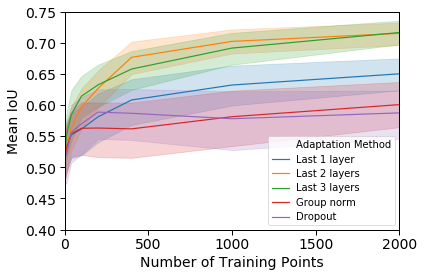

In [327]:
##########################################
#### Generate plot of mean IoU per fine tune method
##########################################

subset = df[ (df["Point Selection Strategy"] == 'Random') ]
ax = sns.lineplot(x='Number of Training Points', y='Mean IoU', hue='Adaptation Method', data=subset)
ax.set(ylim=(0.40, 0.75), xlim=(0,2000))
plt.setp(ax.get_legend().get_texts(), fontsize='10')
ax.get_legend().get_title().set_color('white')
ax.get_legend().get_title().set_fontsize(12)

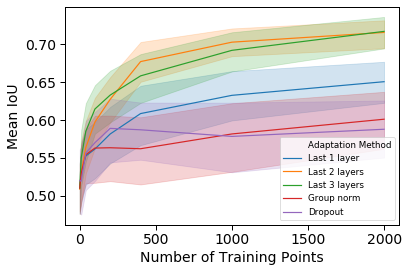

In [328]:
ax = sns.lineplot(x='Number of Training Points', y='Mean IoU', hue='Adaptation Method', data=subset)
#ax.set(xlim=(0,2000))
#ax.set(ylim=(0.45, 0.85))

[None, None, None, None, None, None, None, None, None, None]

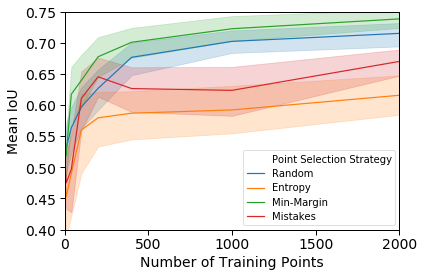

In [329]:
##########################################
#### Generate plot of mean IoU per query strategy
##########################################

subset = df[ (df["Adaptation Method"] == 'Last 2 layers') ]
ax = sns.lineplot(x='Number of Training Points', y='Mean IoU', hue='Point Selection Strategy', data=subset)
ax.set(ylim=(0.40, 0.75), xlim=(0,2000))
plt.setp(ax.get_legend().get_texts(), fontsize='10')

[None, None, None, None, None, None, None, None, None, None]

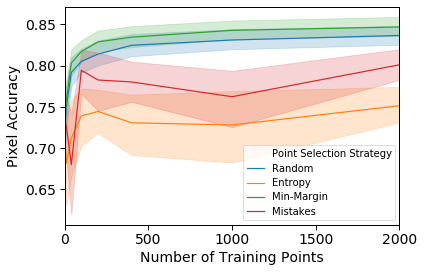

In [330]:
ax = sns.lineplot(x='Number of Training Points', y='Pixel Accuracy', hue='Point Selection Strategy', data=subset)
ax.set(xlim=(0,2000))
plt.setp(ax.get_legend().get_texts(), fontsize='10')